<a href="https://colab.research.google.com/github/rifatkhan545/Deep-Learning/blob/main/tomato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

**Image size and setting the path for the data**

In [3]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/tomato/train'
test_path ='/content/drive/MyDrive/tomato/val'

**InceptionV3 Architecture**

In [4]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 1s 0us/step


There is no need to train the existing layers in InceptionV3

In [5]:
for layer in inception.layers:
  layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/tomato/train/*')

In [36]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model =  Model(inputs= inception.input, outputs = prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [19]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics= ['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(rescale= 1./255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_path, class_mode='categorical', batch_size= 16, target_size=(224,224))
test_set = test_datagen.flow_from_directory(test_path, class_mode='categorical', batch_size= 16, target_size=(224,224))

Found 10022 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [22]:
r = model.fit_generator(training_set, validation_data= test_set, epochs =10, steps_per_epoch= len(training_set), validation_steps= len(test_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
627/627 [==============================] - 5020s 8s/step - loss: 5.8847 - accuracy: 0.5487 - val_loss: 4.1323 - val_accuracy: 0.7124
Epoch 2/10
627/627 [==============================] - 129s 206ms/step - loss: 3.0352 - accuracy: 0.7574 - val_loss: 4.6847 - val_accuracy: 0.7093
Epoch 3/10
627/627 [==============================] - 130s 207ms/step - loss: 3.1297 - accuracy: 0.7950 - val_loss: 6.3435 - val_accuracy: 0.6717
Epoch 4/10
627/627 [==============================] - 130s 207ms/step - loss: 3.2608 - accuracy: 0.8071 - val_loss: 5.1415 - val_accuracy: 0.7561
Epoch 5/10
627/627 [==============================] - 130s 207ms/step - loss: 2.6517 - accuracy: 0.8408 - val_loss: 4.5096 - val_accuracy: 0.8018
Epoch 6/10
627/627 [==============================] - 129s 205ms/step - loss: 2.4788 - accuracy: 0.8502 - val_loss: 7.2543 - val_accuracy: 0.7185
Epoch 7/10
627/627 [==============================] - 129s 206ms/step - loss: 2.6296 - accuracy: 0.8523 - val_loss: 3.9940 - v

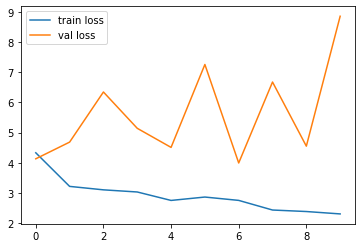

In [24]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

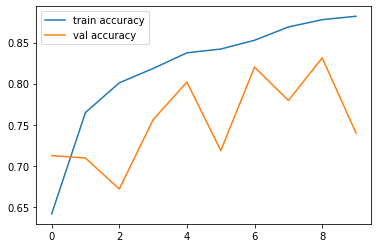

In [25]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

There is not enough data. So, the model under fits which is visible from the graph above

In [26]:
from tensorflow.keras.models import load_model
model.save('inception_model.h5')

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[0.0000000e+00, 1.6582710e-30, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1770633e-27, 3.8333574e-25, ..., 2.8439637e-33,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 8.0746360e-34, 0.0000000e+00, ..., 1.5108127e-29,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.3666939e-24, 9.3618627e-31, ..., 1.6212723e-38,
        0.0000000e+00, 0.0000000e+00],
       [4.1874557e-10, 4.5711206e-11, 2.5666746e-01, ..., 1.0465865e-08,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [29]:
y_pred = np.argmax(y_pred, axis = 1)

In [30]:
y_pred

array([6, 7, 3, 5, 6, 2, 2, 5, 8, 2, 7, 7, 5, 0, 6, 1, 9, 2, 8, 3, 5, 7,
       7, 2, 5, 2, 6, 6, 2, 9, 8, 3, 2, 0, 6, 6, 0, 1, 8, 1, 1, 2, 7, 2,
       2, 6, 9, 3, 2, 1, 2, 9, 2, 6, 1, 2, 2, 3, 7, 6, 0, 3, 1, 2, 2, 2,
       3, 5, 9, 1, 6, 8, 2, 3, 2, 6, 2, 0, 5, 4, 2, 2, 7, 5, 1, 3, 2, 3,
       8, 9, 9, 7, 8, 2, 6, 5, 6, 8, 8, 9, 7, 1, 3, 2, 8, 2, 3, 7, 2, 9,
       7, 8, 7, 8, 0, 7, 1, 3, 7, 2, 7, 3, 9, 1, 9, 1, 1, 3, 3, 2, 2, 2,
       6, 7, 8, 6, 8, 6, 2, 5, 0, 2, 3, 6, 0, 2, 1, 3, 2, 6, 6, 2, 7, 7,
       5, 0, 3, 1, 0, 2, 8, 7, 3, 7, 0, 5, 0, 5, 3, 3, 9, 3, 7, 9, 0, 5,
       8, 2, 1, 0, 8, 0, 2, 5, 2, 8, 8, 6, 0, 3, 3, 2, 5, 9, 1, 2, 7, 0,
       5, 2, 2, 2, 0, 9, 0, 7, 9, 6, 9, 7, 6, 3, 2, 5, 7, 8, 3, 9, 9, 0,
       0, 1, 6, 3, 7, 8, 2, 6, 3, 1, 8, 9, 1, 7, 3, 6, 1, 1, 0, 3, 0, 7,
       7, 9, 0, 5, 5, 2, 0, 3, 3, 1, 8, 1, 7, 2, 8, 1, 6, 1, 3, 3, 1, 0,
       3, 0, 6, 8, 9, 5, 4, 2, 6, 3, 1, 7, 3, 7, 1, 9, 5, 1, 8, 2, 3, 2,
       1, 2, 2, 5, 9, 8, 8, 2, 0, 2, 4, 3, 2, 1, 9,

In [31]:
model = load_model('inception_model.h5')

In [33]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
img = image.load_img('/content/drive/MyDrive/tomato/tomato-leaf-mold.jpg', target_size=(224,224))

In [41]:
x = image.img_to_array(img)
x

array([[[ 16.,  16.,  16.],
        [ 16.,  16.,  16.],
        [ 11.,  11.,  11.],
        ...,
        [ 25.,  25.,  23.],
        [ 18.,  18.,  16.],
        [ 12.,  12.,  10.]],

       [[ 18.,  18.,  18.],
        [ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        ...,
        [ 22.,  22.,  20.],
        [ 16.,  16.,  14.],
        [ 11.,  11.,   9.]],

       [[ 16.,  16.,  16.],
        [ 11.,  11.,  11.],
        [ 13.,  13.,  13.],
        ...,
        [ 21.,  21.,  19.],
        [ 17.,  17.,  15.],
        [ 12.,  12.,  10.]],

       ...,

       [[ 19.,  24.,  18.],
        [ 24.,  29.,  23.],
        [ 25.,  31.,  27.],
        ...,
        [  0.,   0.,   2.],
        [  0.,   1.,   0.],
        [157., 147., 171.]],

       [[ 22.,  27.,  21.],
        [ 29.,  34.,  28.],
        [ 30.,  36.,  32.],
        ...,
        [  1.,   3.,   2.],
        [  0.,   1.,   2.],
        [152., 145., 163.]],

       [[ 23.,  28.,  22.],
        [ 29.,  34.,  28.],
        [ 31.,  

In [46]:
x.shape

(224, 224, 3)

In [47]:
x =x/255

In [48]:
x

array([[[-0.00391964, -0.00391964, -0.00391964],
        [-0.00391964, -0.00391964, -0.00391964],
        [-0.00392024, -0.00392024, -0.00392024],
        ...,
        [-0.00391855, -0.00391855, -0.00391879],
        [-0.0039194 , -0.0039194 , -0.00391964],
        [-0.00392012, -0.00392012, -0.00392036]],

       [[-0.0039194 , -0.0039194 , -0.0039194 ],
        [-0.00392   , -0.00392   , -0.00392   ],
        [-0.00392   , -0.00392   , -0.00392   ],
        ...,
        [-0.00391892, -0.00391892, -0.00391916],
        [-0.00391964, -0.00391964, -0.00391988],
        [-0.00392024, -0.00392024, -0.00392048]],

       [[-0.00391964, -0.00391964, -0.00391964],
        [-0.00392024, -0.00392024, -0.00392024],
        [-0.00392   , -0.00392   , -0.00392   ],
        ...,
        [-0.00391904, -0.00391904, -0.00391928],
        [-0.00391952, -0.00391952, -0.00391976],
        [-0.00392012, -0.00392012, -0.00392036]],

       ...,

       [[-0.00391928, -0.00391867, -0.0039194 ],
        [-0

In [49]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
img_data

array([[[[-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         ...,
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308]],

        [[-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         ...,
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308]],

        [[-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         ...,
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308]],

        ...,

        [[-1.0000308, -1.0000308, -1.0000308],
         [-1.0000308, -1.0000308, -1.0000308]

In [52]:
model.predict(img_data)

array([[4.5687977e-27, 1.9458872e-05, 9.9998057e-01, 1.1508692e-12,
        1.4342629e-14, 1.1275525e-20, 2.1048186e-20, 4.2515096e-20,
        6.9094612e-11, 3.1879282e-20]], dtype=float32)

In [53]:

a=np.argmax(model.predict(img_data), axis=1)

In [54]:
a

array([2])